# Анализ закономерностей определяющих успешность игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- `Name` — название 
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Цели исследования
1. Выявить определяющие успешность игры закономерности.
2. Подготовить данные для планирования кампании на 2017 год.
3. Проверить гипотезы.

### Ход исследования
Данные о продажах игр я получу из файла /datasets/games.csv. О качестве данных ничего неизвестно, поэтому перед тем как приступить к ходу исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Потом создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом исследование пройдёт в шесть этапов:
1. Обзор даных
2. Предобработка данных
3. Исследовательский анализ данных
4. Анализ портрета пользователя каждого региона
5. Проверка гипотез
6. Написание общего вывода

## 1. Обзор даных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:/Users/salpa/Downloads/games.csv')

In [2]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


- В таблице 16715 строк. Есть пропуски и неправильные типы данных.

## 2. Предобработка данных

Приводим названия столбцов к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Смотрим количество пропусков.

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- Думаю, что два пропуска в названии и жанре - это одни и те же строки.

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Бинго. Их можно удалить, роли они не сыграют.

In [8]:
data.dropna(subset=['name'], inplace=True) #удаляем строки с пропусками в столбце name

Ни в одном из остальных столбцов заменять пропуски медианой или средним значением я не буду. Дата релиза игры - это важные и точные данные. А оценки критиков и игроков - это довольно субъективная цифра.

In [9]:
data['rating'] = data['rating'].fillna('unknown') #заполняем пропуски в рейтингах словом "неизвестно"

In [10]:
data['year_of_release'] = pd.to_numeric(data['year_of_release']) #переводим столбец year_of_release в числовой
data['year_of_release'] = data['year_of_release'].fillna(0) #заполняем в нём пропуски нулями
data['year_of_release'] = data['year_of_release'].astype(int) #меняем тип данных в столбце на целочисленный

In [11]:
data['critic_score'].unique() #смотрим уникальные значения в столбце critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

- Ничего лишнего не замечено.

In [12]:
data['user_score'].unique() #смотрим уникальные значения в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

- Видим среди оценок и пропусков значение "TBD" - to be determined (будет определено). Это означает, что оценку ещё не успели поставить. Для нас это равносильно пропускам.

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors ='coerce')
##переводим столбец user_score в числовой, TBD автоматически заменяется на пропуски

data['user_score'] = data['user_score'] * 10 
#приводим вид оценок в столбце user_score к такому же виду как и в critic_score

Создаём столбец с суммарными продажами во всех регионах.

In [14]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] #суммируем
data.head() #смотрим что получилось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,80.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,83.00,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,80.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Проверим данные на явные дубликаты.

In [15]:
data.duplicated().sum()

0

- Дубликатов не обнаружено.

## 3. Исследовательский анализ данных

Смотрим сколько игр выпускалось в разные годы.

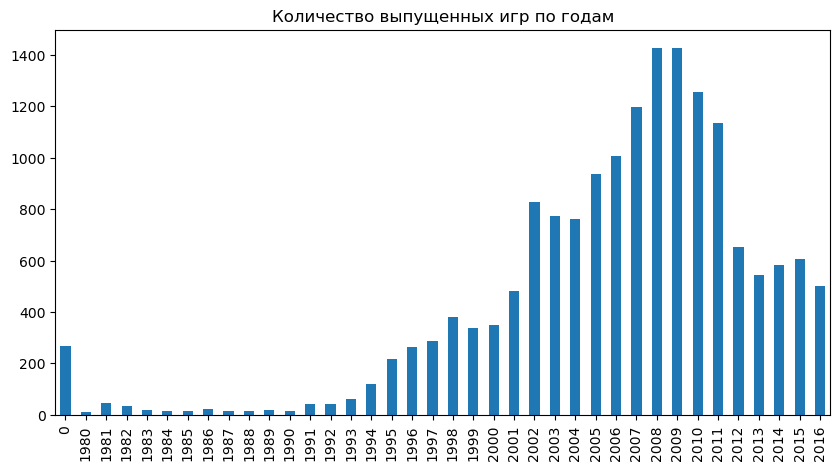

In [16]:
data['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title = 'Количество выпущенных игр по годам')
plt.show()

- Видим, что с начала нулевых годов начинается резкий рост количества выпускаемых игр. Оно и не удивительно, именно в это время персональные компьютеры, а чуть позднее и консоли, получили широкое распространение и появились буквально в каждом доме.
- Важны ли данные за все периоды? Думаю, что нет. Я бы для анализа брал данные с 1995 года, как раз в декабре 1994 вышла первая PlayStation. Проверим это далее.

Посмотрим как менялись продажи по платформам.

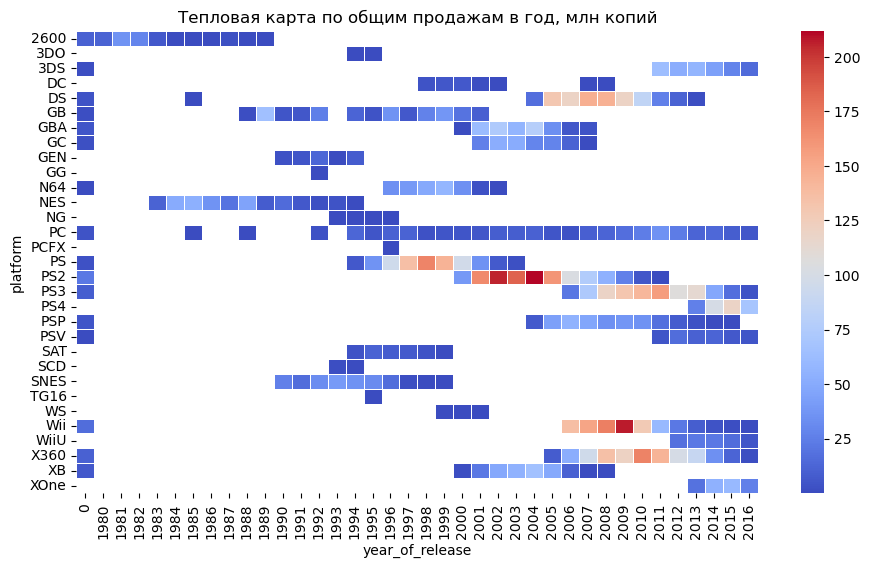

In [17]:
platforms_pivot = data.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum')
f, ax = plt.subplots(figsize=(11, 6))
sns.heatmap(platforms_pivot, linewidths=.5, cmap="coolwarm").set(title='Тепловая карта по общим продажам в год, млн копий')
plt.show()

- Видно как начало эпохи стартовало с Atari 2600, потом подключилась Nintendo Entertainment System (NES), которую у нас в стране неофициально распространяли как Dendy, затем вышел GameBoy (GB), ну а следом началась долгая эпоха персональных компьютеров (PC) и вороха консолей новых поколений.
- Отдельно заметим яркие всплески на тепловой карте - это Nintendo DS (следующая портативная консоль после GameBoy), это Sony и их продукты по очереди: PlayStation 1, 2 и 3, а также Nintendo Wii и Xbox 360.
- Если смотреть на последние годы с целью выделить потенциально прибыльные платформы, то видим следующее: 3DS показывает падение, PS Vita (PSV) тоже не растёт, Wii умирает, WiiU не взлетела. Обратить внимание стоит на две новые платформы, предыдущие поколения которых были очень успешны, это - PS4 и XOne.

Теперь посмотрим топ-10 платформ.

In [18]:
platforms = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').reset_index()
platforms.sort_values(by='all_sales', ascending=False).reset_index(drop=True).head(10)

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


- Выделяются именно те шесть платформ, которые я определил выше по ярким клеткам на тепловой карте.

Рассмотрим их подробнее.

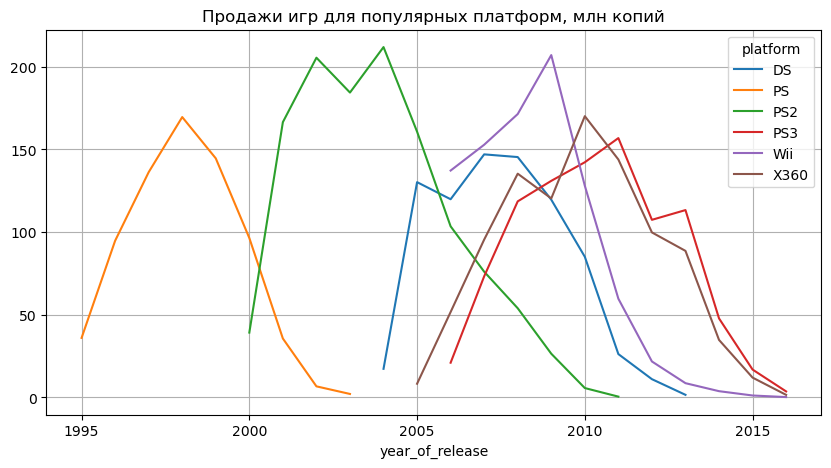

In [19]:
platforms_top6 = data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum') 
#делаем сводную таблицу
platforms_top6 = platforms_top6.query("year_of_release > 1994") 
#период ограничиваем 1995-2016 годами
platforms_top6 = platforms_top6.loc[:,platforms_top6.columns.isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])] 
#удаляем в своднике все колонки кроме нужных нам шести платформ
platforms_top6.plot(figsize=(10, 5), grid=True, title = 'Продажи игр для популярных платформ, млн копий') 
plt.show()
#строим график

- Срок жизни популярных платформ 8-10 лет с пиком посередине. Нам нужно определить актуальный период, который нужен для построения прогноза на 2017 год. Учитывая то, что уже есть данные за четыре года по новым потенциально популярным платформам (PS4 и XOne), принимаю срок актуального периода - с 2013 по 2016. Получается, что для анализа в этот период из платформ мы минусуем PS, PS2 и DS, а PS4 и XOne плюсуем.

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам.

              mean    median       sum
         all_sales all_sales all_sales
platform                              
PS3           0.53      0.15    181.43
PS4           0.80      0.20    314.14
Wii           0.59      0.18     13.66
X360          0.74      0.27    136.80
XOne          0.65      0.22    159.32


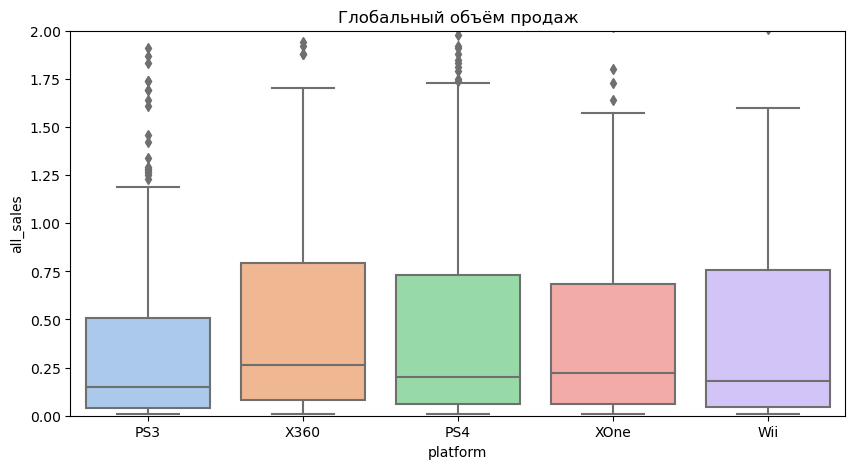

In [20]:
actual_data = data.query('year_of_release > 2012')
#создаём новый датафрейм по актуальному периоду
actual_data_top6 = actual_data.query("platform in ('X360', 'PS3', 'Wii', 'PS4', 'XOne')")
#создаём новый датафрейм по актуальному периоду оставив только нужные платформы

platforms_top6 = actual_data_top6.pivot_table(index='platform', values='all_sales', aggfunc=['mean', 'median', 'sum'])
print(platforms_top6) #делаем сводную таблицу по средним и медианным значениям, а также сумме

f, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(0, 2)
sns.boxplot(x='platform', y='all_sales', data=actual_data_top6, palette='pastel').set(title='Глобальный объём продаж') #строим график
plt.show()

- Медиана у всех платформ находится на уровне 0,2 млн за игру.
- Третий квартиль у всех кроме PS3 расположен на уровне 0,75 млн.
- Несмотря на это, по общим продажам видно, что платформа Wii перестала быть конкурентоспособной.
- PS4 уже полноценно заменила PS3, чего не скажешь о XOne и X360.
- Среднее и сумма по платформе PS4 показывают, что она в данный момент является лидером на рынке.

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Популярная платформа - очевидно PS4.

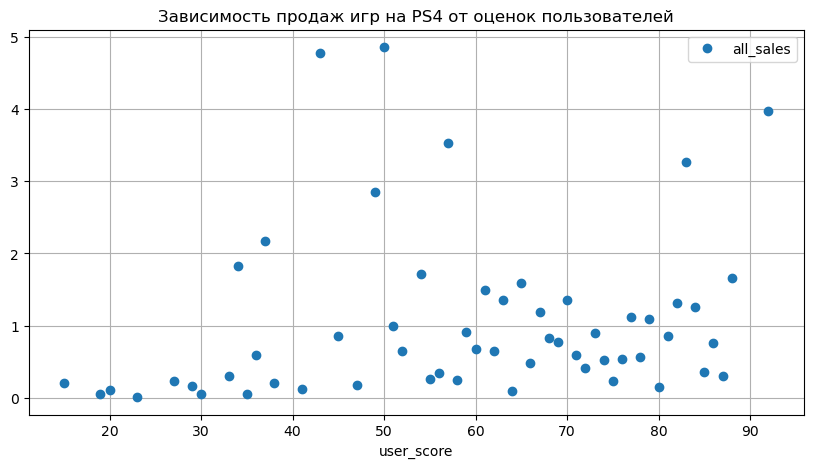

Корреляция Пирсона: -0.031957110204556445


In [22]:
actual_data_ps4 = actual_data.query("platform == 'PS4'")

actual_data_ps4.pivot_table(index='user_score', values='all_sales').plot(style='o', figsize=(10, 5), grid=True, title = 'Зависимость продаж игр на PS4 от оценок пользователей')
plt.show()
print('Корреляция Пирсона:', actual_data_ps4['user_score'].corr(actual_data_ps4['all_sales']))
#строим корреляцию Пирсона и диаграмму зависимости продаж на PS4 от оценок пользователей

- Корреляции не вижу. Что не удивительно - пользователи как правило эмоциональны и субъективны.

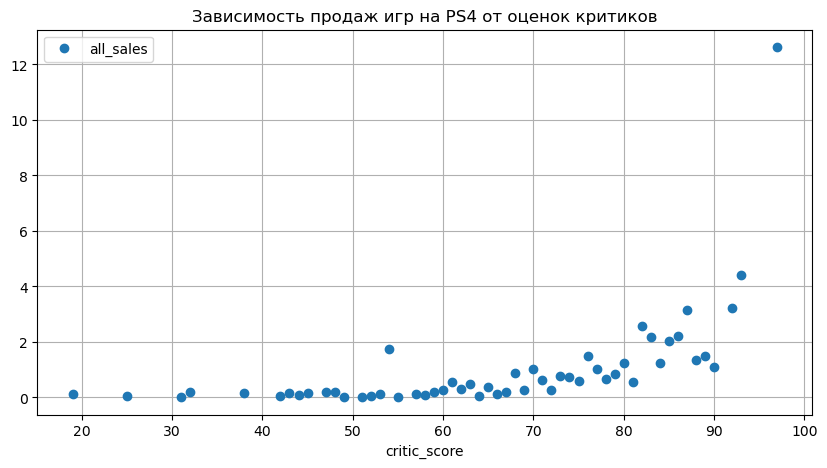

Корреляция Пирсона: 0.40656790206178095


In [23]:
actual_data_ps4.pivot_table(index='critic_score', values='all_sales').plot(style='o', figsize=(10, 5), grid=True, title = 'Зависимость продаж игр на PS4 от оценок критиков')
plt.show()
print('Корреляция Пирсона:', actual_data_ps4['critic_score'].corr(actual_data_ps4['all_sales']))#строим корреляцию Пирсона и диаграмму зависимости продаж  на PS4 от оценок критиков

- Критики же являются более последовательными. Здесь мы видим очевидную корреляцию между оценками и продажами.

Посмотрим корреляцию на остальных популярных платформах.

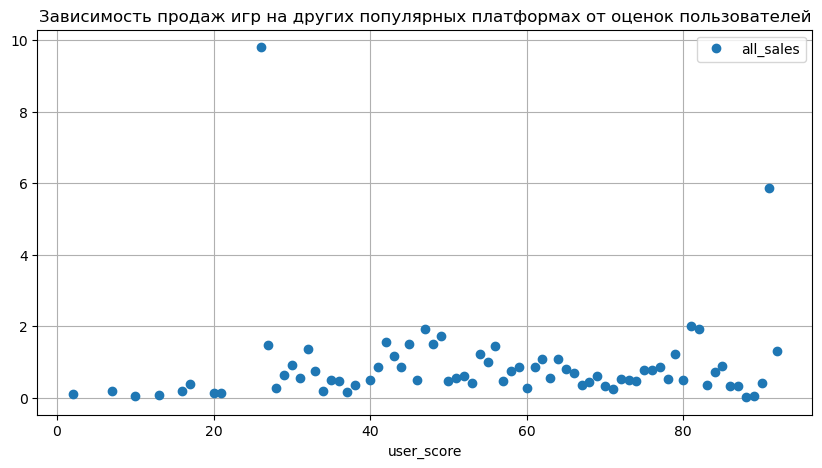

Корреляция Пирсона: -0.014723870972128414


In [24]:
actual_data_other = actual_data.query("platform in ('X360', 'PS3', 'Wii', 'XOne')")
actual_data_other.pivot_table(index='user_score', values='all_sales').plot(style='o', figsize=(10, 5), grid=True, title = 'Зависимость продаж игр на других популярных платформах от оценок пользователей')
plt.show()
print('Корреляция Пирсона:', actual_data_other['user_score'].corr(actual_data_other['all_sales']))
#строим корреляцию Пирсона и диаграмму зависимости продаж на остальных платформах от оценок пользователей

- Корреляция минусовая, как и в случае с PS4.

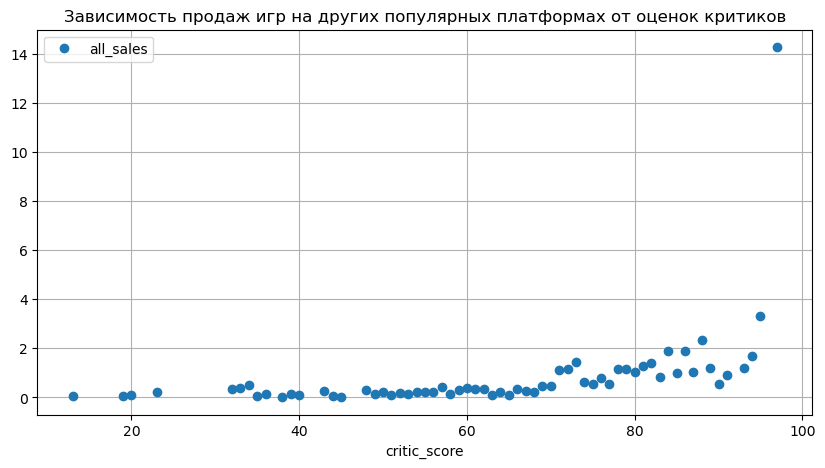

Корреляция Пирсона: 0.3352937192963898


In [25]:
actual_data_other.pivot_table(index='critic_score', values='all_sales').plot(style='o', figsize=(10, 5), grid=True, title = 'Зависимость продаж игр на других популярных платформах от оценок критиков')
plt.show()
print('Корреляция Пирсона:', actual_data_other['critic_score'].corr(actual_data_other['all_sales']))
#строим корреляцию Пирсона и диаграмму зависимости продаж на остальных платформах от оценок критиков

- Корреляция чуть меньшая чем на PS4, но всё равно отчётливо прослеживаемая.

Посмотрим на общее распределение игр по жанрам.

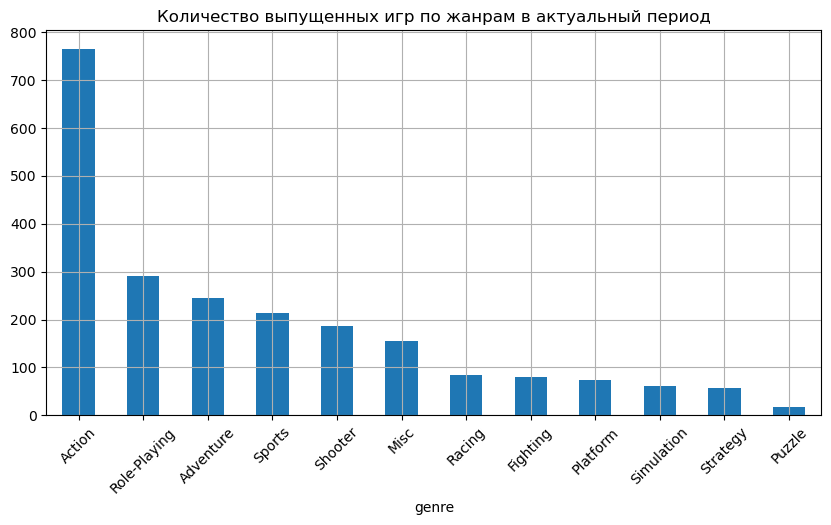

In [26]:
actual_data.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=45, grid=True, title = 'Количество выпущенных игр по жанрам в актуальный период')
plt.show()

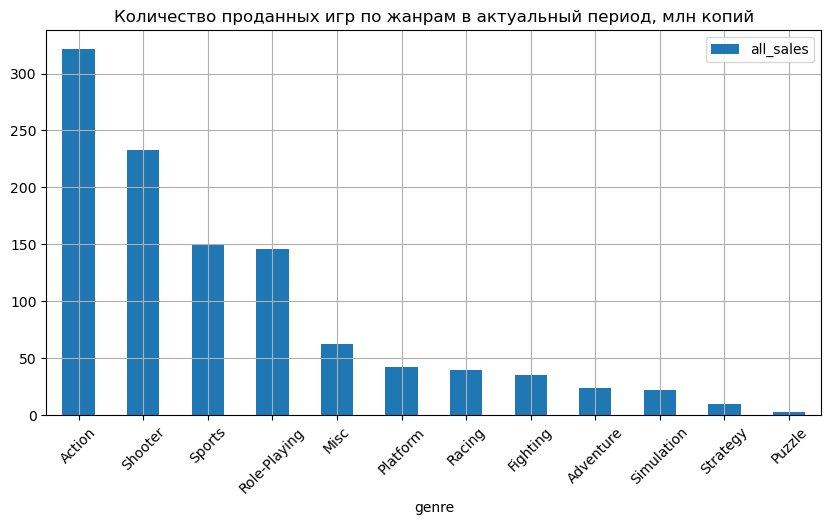

In [27]:
actual_data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).plot(kind='bar', figsize=(10, 5), rot=45, grid=True, title = 'Количество проданных игр по жанрам в актуальный период, млн копий')
plt.show()

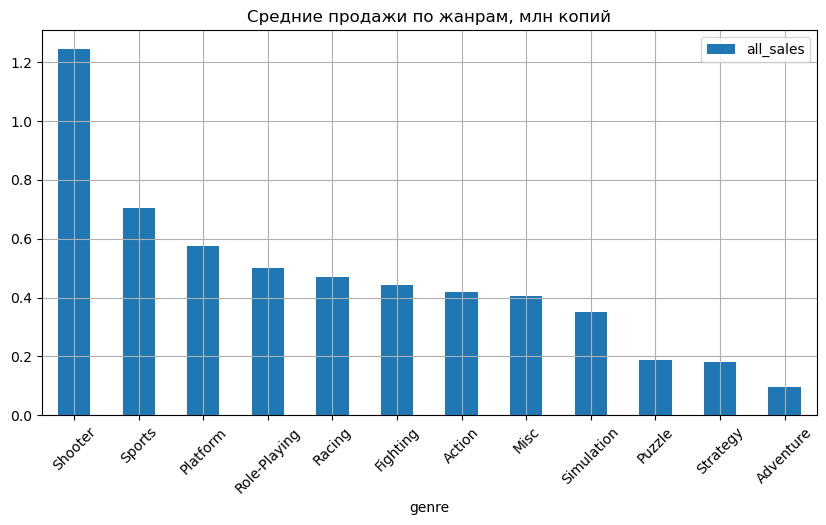

In [28]:
actual_data.pivot_table(index='genre', values='all_sales', aggfunc='mean').sort_values(by='all_sales', ascending=False).plot(kind='bar', figsize=(10, 5), rot=45, grid=True, title = 'Средние продажи по жанрам, млн копий')
plt.show()

- Самые выпускаемые игры жанра Action - в 2,5 раза больше чем второй по количеству релизов жанр Role-Playing. Третий в списке - Adventure.
- Action является и самым продаваемым жанром, поэтому неудивительно, что разработчики так рьяно берутся за производтсва игр данного жанра.
- Но количество не всегда перетекает в качество, и в среднем одна выпущенная игра в жарне Action продаётся в количестве 400 тыс. копий.
- Лидеры по среднему количеству проданных копий - жанры Shooter и Sports. Оба этих жанра не являются самыми производимыми, но неизменно пользуются спросом.
- Самые непопулярные жанры и среди разработчиков и среди покупателей - Puzzle, Strategy и Simulation.

## 4.  Анализ портрета пользователя каждого региона

Посмотрим самые популярные платформы по регионам.

In [29]:
user_platform = actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'all_sales'], aggfunc='sum').sort_values(by='all_sales', ascending=False)
user_platform

,all_sales,eu_sales,jp_sales,na_sales
platform,,,,
PS4,314.14,141.09,15.96,108.74
PS3,181.43,67.81,23.35,63.50
XOne,159.32,51.59,0.34,93.12
3DS,143.25,30.96,67.81,38.20
X360,136.80,42.52,0.51,81.66
WiiU,64.63,19.85,10.88,29.21
PC,39.43,25.36,0.00,11.11
PSV,32.99,6.10,18.59,5.04
Wii,13.66,5.93,0.05,6.56


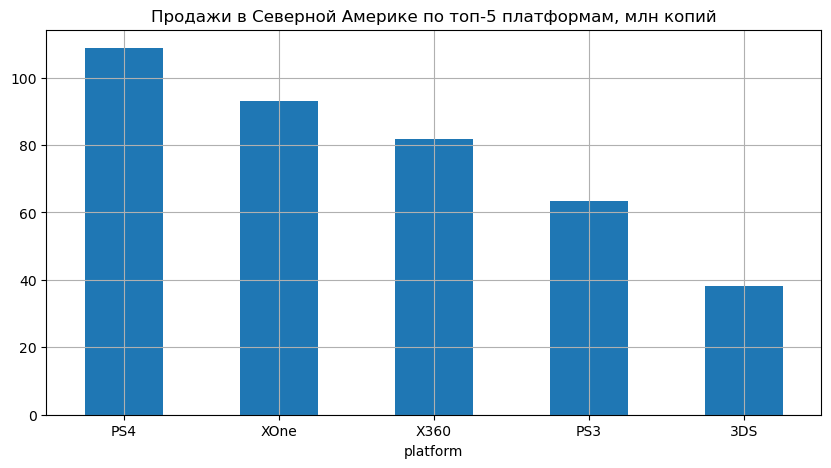

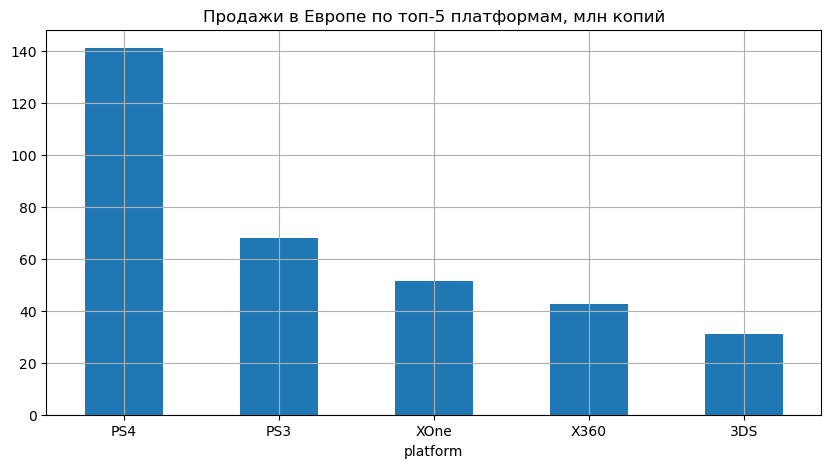

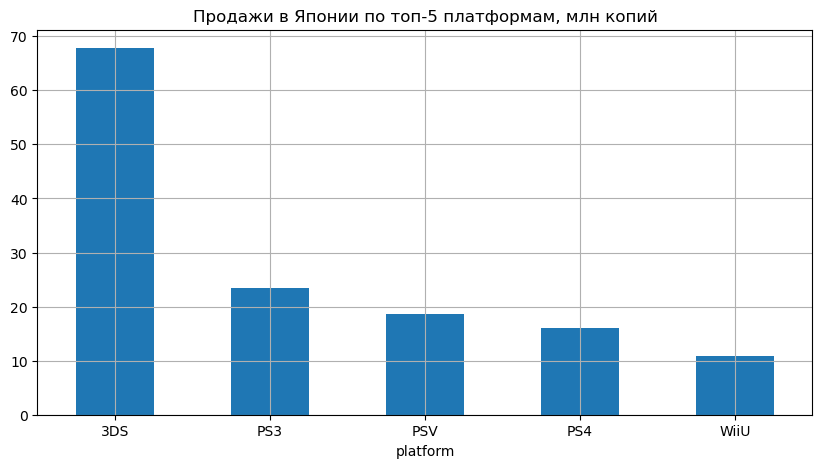

In [30]:
user_platform['na_sales'].sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 5), rot=0, grid=True, title = 'Продажи в Северной Америке по топ-5 платформам, млн копий')
plt.show()
user_platform['eu_sales'].sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 5), rot=0, grid=True, title = 'Продажи в Европе по топ-5 платформам, млн копий')
plt.show()
user_platform['jp_sales'].sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 5), rot=0, grid=True, title = 'Продажи в Японии по топ-5 платформам, млн копий')
plt.show()

- В Северной Америке и Европе лидирует платформа PS4.
- После PS4 в Северной Америке популярны продукты местной компании Майкрософт - XOne и X360. У первой из них велик шанс побороться за лидерство.
- В Японии доминируют портативные консоли - 3DS (в гораздо большей степени) и PSV. Остальные популярные платформы тоже японские, пользователи страны восхоящего солнца весьма патриотичны.

Посмотрим самые популярные жанры по регионам.

In [31]:
user_genre = actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'all_sales'], aggfunc='sum').sort_values(by='all_sales', ascending=False)
user_genre.head(10)

,all_sales,eu_sales,jp_sales,na_sales
genre,,,,
Action,321.87,118.13,40.49,126.05
Shooter,232.98,87.86,6.61,109.74
Sports,150.65,60.52,5.41,65.27
Role-Playing,145.89,36.97,51.04,46.40
Misc,62.82,20.04,9.20,27.49
Platform,42.63,15.58,4.79,18.14
Racing,39.89,20.19,2.30,12.96
Fighting,35.31,8.55,7.65,15.55
Adventure,23.64,8.25,5.82,7.14


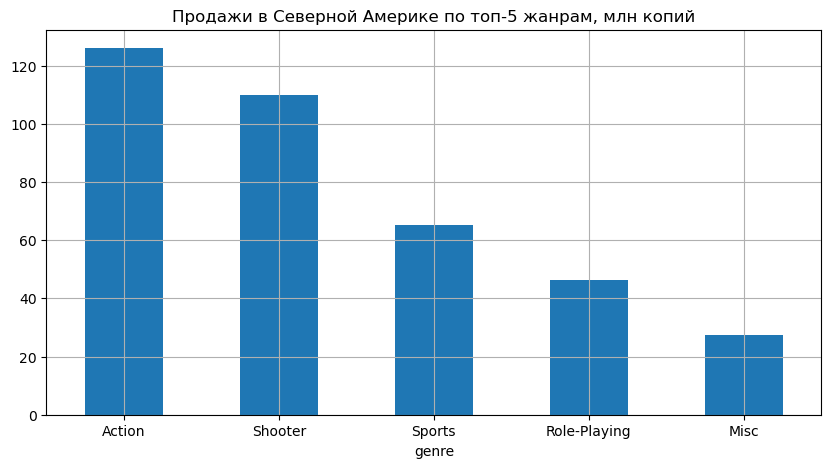

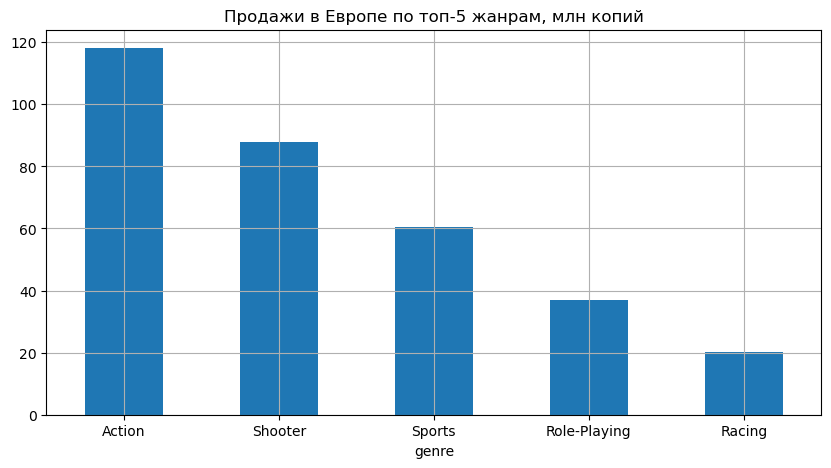

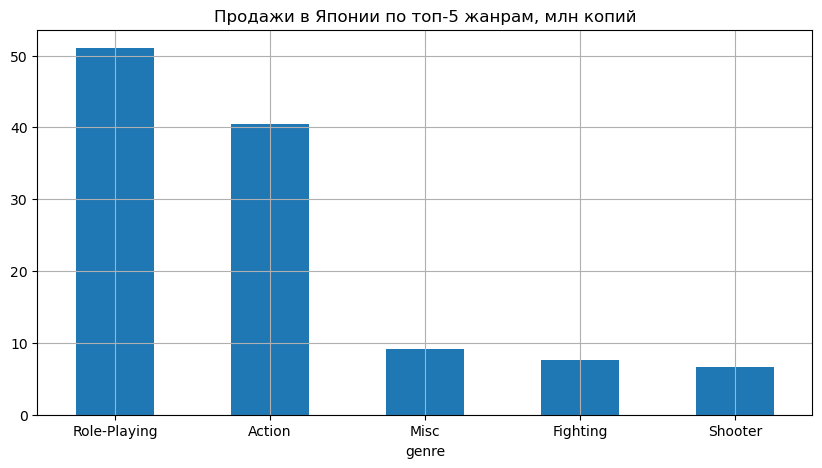

In [32]:
user_genre['na_sales'].sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 5), rot=0, grid=True, title = 'Продажи в Северной Америке по топ-5 жанрам, млн копий')
plt.show()
user_genre['eu_sales'].sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 5), rot=0, grid=True, title = 'Продажи в Европе по топ-5 жанрам, млн копий')
plt.show()
user_genre['jp_sales'].sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 5), rot=0, grid=True, title = 'Продажи в Японии по топ-5 жанрам, млн копий')
plt.show()

- В Северной Америке и Европе популярны одни и те же жанры - Action, Shooter, Sports, Role-Playing.
- Action занимает там первые места по продажам, в Японии же он уступает только Role-Playing играм. Рассмотрим их подробнее.

In [33]:
actual_data.pivot_table(index=['genre', 'name'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(10)

jp_sales
genre        name                                               
Role-Playing Pokemon X/Pokemon Y                            4.35
             Monster Hunter 4                               3.44
Fighting     Super Smash Bros. for Wii U and 3DS            3.24
Role-Playing Yokai Watch 2 Ganso/Honke                      3.18
             Pokemon Omega Ruby/Pokemon Alpha Sapphire      3.10
Action       Monster Hunter X                               2.79
Role-Playing Yokai Watch 2 Shinuchi                         2.68
             Monster Hunter 4 Ultimate                      2.62
Action       Yokai Watch Busters                            2.29
Role-Playing Pokemon Sun/Moon                               2.26

- Популярность ролевых игр объясняется тем, что как и в случае с платформами, жители Японии любят внутренний продукт больше иностранного. А во внутреннем продукте превалирует именно жанр ролевых игр известных серий - Pokemon, Monster Hunter, Yokai Watch.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [34]:
user_esrb = actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
print('Распределение продаж по рейтингу в Северной Америке:')
print(user_esrb['na_sales'].sort_values(ascending=False))
print('Распределение продаж по рейтингу в Европе:')
print(user_esrb['eu_sales'].sort_values(ascending=False))
print('Распределение продаж по рейтингу в Японии:')
print(user_esrb['jp_sales'].sort_values(ascending=False))

Распределение продаж по рейтингу в Северной Америке:
rating
M         165.21
unknown    89.42
E          79.05
E10+       54.24
T          49.79
Name: na_sales, dtype: float64
Распределение продаж по рейтингу в Европе:
rating
M         145.32
E          83.36
unknown    78.91
E10+       42.69
T          41.95
Name: eu_sales, dtype: float64
Распределение продаж по рейтингу в Японии:
rating
unknown   85.05
T         20.59
E         15.14
M         14.11
E10+       5.89
Name: jp_sales, dtype: float64


- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет
- E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

---

- В Северной Америке и Европе популярны игры для взрослых - с рейтингом М.
- В Японии же ровно наоборот - лидируют игры для тинейджеров и вообще всех.

## 5. Проверка гипотез

Первая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Применяем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Это значит, что нулевая гипотеза - средние рейтинги платформ Xbox One и PC равны, а альтернативная - не равны.

In [35]:
xone = actual_data.query("platform == 'XOne' and user_score >= 0")['user_score']  #делаем срез пользовательских оценок по платформе XOne
pc = actual_data.query("platform == 'PC' and user_score >= 0")['user_score']  #делаем срез пользовательских оценок по платформе PC

alpha = 0.05 #уровень статистической значимости

results = st.ttest_ind(xone, pc, equal_var = False) #ставлю False потому что есть сомнения, что дисперсии у совокупностей одинаковые

print('p-значение:', results.pvalue) #выводим на экран полученное p-значение

if results.pvalue < alpha: #сравниваем p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


Получается, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

---

Вторая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Применяем тот же метод. Нулевая гипотеза - средние рейтинги платформ жанров Action и Sports равны, а альтернативная - не равны.

In [36]:
action = actual_data.query("genre == 'Action' and user_score >= 0")['user_score']  #делаем срез пользовательских оценок по жанру экшн
sports = actual_data.query("genre == 'Sports' and user_score >= 0")['user_score']  #делаем срез пользовательских оценок по жанру спорт

alpha = 0.05 #уровень статистической значимости

results = st.ttest_ind(action, sports, equal_var = False) #ставлю False потому что есть сомнения, что дисперсии у совокупностей одинаковые

print('p-значение:', results.pvalue) #выводим на экран полученное p-значение

if results.pvalue < alpha: #сравниваем p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.446003970070494e-20
Отвергаем нулевую гипотезу


Получается, что средние пользовательские рейтинги жанров Action и Sports разные.

## 6. Общий вывод

Мы загрузили файл и сделали обзор данных. Затем исправили названия колонок, удалили пару строк с пропусками, исправили типы данных в нужных столбцах, привели в порядок значения в строках. Потом добавили столбец с общими продажами по всем регионам. После всего этого приступили к анализу данных. Построили графики из которых получили основные выводы:

- Больше всего игр ежегодно выпускалось во второй половине нулевых, когда компании делали минимум 1000 релизов каждый год, но после 2011 года эта цифра резко упала до 500-600 и осталась стабильной по сей день.
- Из года в год у пользователей менялось предпочтение по платформам, но за всю эпоху можно выделить трёх производителей с максимальными продажами игр для их систем: 
 1. Sony и их PS, PS2, PS3 и сейчас PS4
 2. Microsoft и их X360 и сейчас XOne
 3. Nintendo и их NES, DS и Wii
- Топ-3 популярных платформы за всё время исследования: PS2, X360, PS3
- В данный момент самые популярные платформы с потенциальным ростом: PS4, XOne.
- PC - долгоиграющая платформа, но без того потенциала, который мы наблюдали по платформам из двух предыдущих пунктов.
- Срок жизни каждой популярной платформы 8-10 лет.
- За последние четыре года одна игра для популярной платформы продаётся в количестве 650 тыс. копий.
- Зависимость между продажами игр и оценками критиков наблюдается небольшая, тогда как зависимости между продажами игр и оценками пользователей нет вообще.
- Самые популярные жанры: Action, Shooter, Sports, Role-Playing.
- Самая поплярная платформа в Северной Америке и Европе - PS4, в Японии - 3DS.
- Самые поплярные жанры в Северной Америке и Европе - Action и Shooter, в Японии - Role-Playing и Action.

Также мы проверили интересующие нас гипотезы и оказалось:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Средние пользовательские рейтинги жанров Action и Sports разные.